In [1]:
import folium
import pandas as pd

# Load the squirrel data
data = pd.read_csv("../data/squirrel_data.csv")

# Columns 'X' and 'Y' correspond to longitude and latitude, respectively
data = data[['X', 'Y']]

# Create the map focused on Central Park
m = folium.Map(location=[40.785091, -73.968285], zoom_start=15, tiles='CartoDB Positron')

# Adding squirrel locations to the map
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=(row['Y'], row['X']),
        radius=3,  # fixed radius
        fill=True,
        fill_opacity=0.7,
        color='gray',
        fill_color='gray'
    ).add_to(m)

# Display the map
m

# Save the map to an HTML file if needed
m.save('squirrel_data.html')

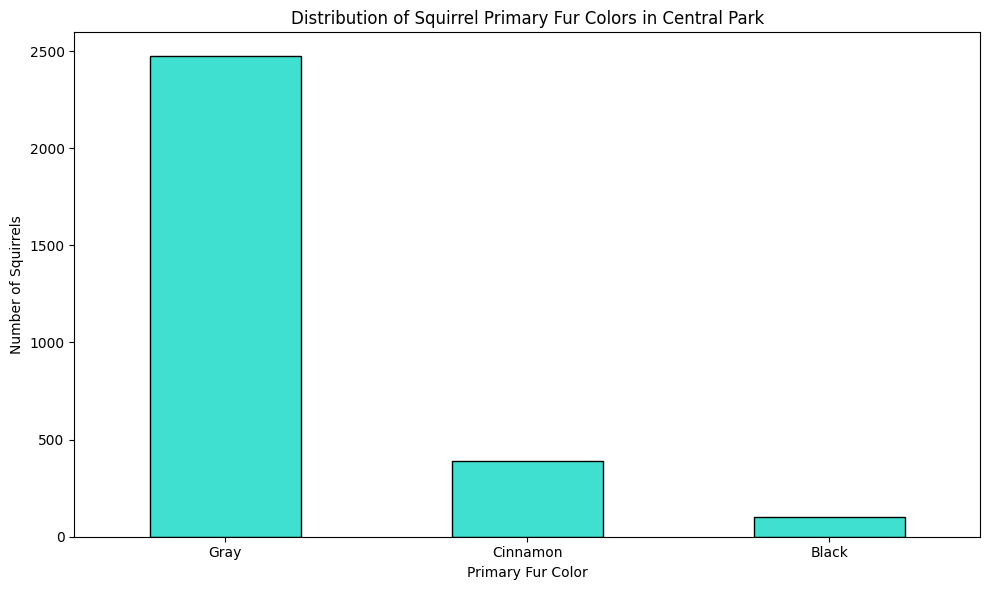

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the squirrel data
data = pd.read_csv("../data/squirrel_data.csv")

# Drop NaN values and count the unique values of 'Primary Fur Color'
color_counts = data['Primary Fur Color'].dropna().value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='turquoise', edgecolor='black')

# Titles and labels
plt.title("Distribution of Squirrel Primary Fur Colors in Central Park")
plt.ylabel("Number of Squirrels")
plt.xlabel("Primary Fur Color")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
